In [10]:
%%bash
exit 0


# you can use environment.yml file to set up the environment
mamba env create -f environment.yml
mamba activate cg-idps



In [11]:
import pandas as pd

# Load the data from the pickle file
M1 = pd.read_pickle('ICL2.pkl')

# Assuming the DataFrame M1 has the experimental PRE data
# where column 1 is x (residue numbers) and column 2 is y (PRE values)
# Extract x and y
x = M1.iloc[:, 0]  # First column as x-axis
y = M1.iloc[:, 1]  # Second column as y-axis

# Combine into a new DataFrame
df = pd.DataFrame({'resid': x, 'exp_PRE': y})

# Display the processed DataFrame
print(df)

         resid   exp_PRE
0   415.453039  0.497942
1   416.513812  0.339506
2   419.607735  0.413580
3   420.933702  0.376543
4   422.348066  0.251029
..         ...       ...
58  506.856354  0.362140
59  510.215470  0.253086
60  511.099448  0.660494
61  511.895028  0.633745
62  513.044199  0.831276

[63 rows x 2 columns]


In [12]:
from DEERPREdict.PRE import PREpredict
import MDAnalysis
import pandas as pd

# path to pdb+xtc
pdb_path="md_2000ns_ICL2.gro"
dcd_path="shortened_traj_ICL2.xtc"

# PRE analysis of simulations using PREpredict
# label == residue with PRE probe
def evaluatePRE(label):
    u = MDAnalysis.Universe(pdb_path,dcd_path)
    PRE = PREpredict(u, label, log_file = 'file.log', temperature = 283, atom_selection = 'N', sigma_scaling = 1.0) # Cbeta=True
    PRE.run(output_prefix = 'calcPREs/res', load_file=False, tau_t = 1e-10, tau_c = 1.0*1e-09, r_2 = 10, wh = 700)

# numbers are positions of PRE probes (labels)
evaluatePRE(24)




    residue   i_ratio   gamma_2
0       1.0       NaN       NaN
1       2.0  0.867329  1.372485
2       3.0  0.938607  0.591281
3       4.0  0.892455  1.084217
4       5.0       NaN       NaN
..      ...       ...       ...
95     96.0       NaN       NaN
96     97.0  0.645850  4.763237
97     98.0  0.795127  2.291670
98     99.0  0.722915  3.373958
99    100.0  0.664435  4.402201

[100 rows x 3 columns]
0     413
1     414
2     415
3     416
4     417
     ... 
95    508
96    509
97    510
98    511
99    512
Name: resid, Length: 100, dtype: int64


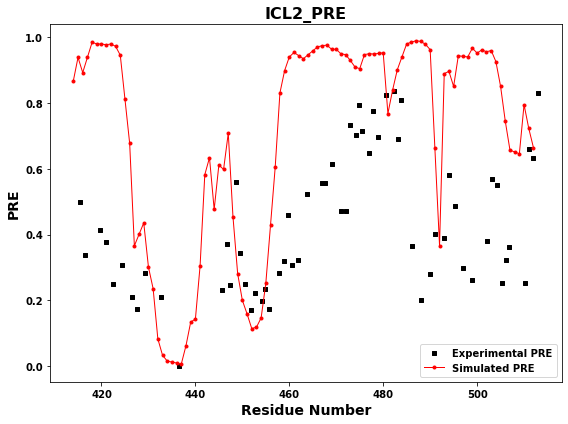

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load PRE from simulations into a DataFrame
filename = 'calcPREs/res-24.dat'
df_sim = pd.read_csv(
    filename,
    delim_whitespace=True,
    skiprows=1,
    names=['residue', 'i_ratio', 'gamma_2']
)

print(df_sim)

# Convert residue numbers to integers and rename the column for consistency
df_sim['residue'] = df_sim['residue'].astype(int)
df_sim['residue'] += 412
df_sim = df_sim.rename(columns={'residue': 'resid'})
# Assuming `df` contains experimental PRE data
# Map simulated data (i_ratio) to the experimental DataFrame based on residue ID
#df[f'sim_24'] = df_sim.set_index('resid')['i_ratio']

# PLOTTING PRE experimental vs simulations
plt.rcParams.update({'font.size': 10, 'font.weight': 'bold'})

title = 'ICL2_PRE'

fig, ax = plt.subplots(figsize=(8, 6))  # Single subplot for one label

df['exp_PRE'] = df['exp_PRE'].interpolate(method='linear')
df_sim['i_ratio'] = df_sim['i_ratio'].interpolate(method='linear')
# Scatter plot for experimental PRE data
ax.scatter(
    df['resid'], 
    df[f'exp_PRE'], 
    marker='s', 
    s=10, 
    color='black', 
    label='Experimental PRE'
)

print(df_sim['resid'])
# Line plot for simulated PRE data
ax.plot(
    df_sim['resid'], 
    df_sim['i_ratio'], 
    color='red', 
    linewidth=1, 
    marker='o', 
    markersize=3, 
    label='Simulated PRE'
)

# Adding labels and title
ax.set_xlabel('Residue Number', fontsize=14, fontweight='bold')
ax.set_ylabel('PRE', fontsize=14, fontweight='bold')
ax.set_title(title, fontsize=16, fontweight='bold')
ax.legend()

plt.tight_layout()
plt.savefig(f'{title}.pdf')
plt.show()


